In [9]:
# This loads some style files
from IPython.core.display import HTML
with open( './style/custom.css', 'r' ) as f: html_style = f.read()
HTML( html_style )

# Bernoulli random variables

A r.v. $X\in R$ is called a <mark>Bernoulli</mark> if $R=\{0,1\}$. 

Bernoulli r.v. model that has only two possible outcomes which are conventionally called failure and success.

Usually $0$ stands for <mark>failure</mark> and $1$ stands for <mark>success</mark>.  

We call $\Pr(X{=}1)$ the <mark>probability of success</mark> of $X$.
    
(In some examples we allow $R$ to be any that contains only two elements, e.g. very common is $R=\{H,T\}$, where $H$ stands for head and $T$ stands for tail. Then we understand that one of the two values is identified vith succes and the other with failure -- in this course, $H$ is success and $T$ is falure.)

A Bernoulli r.v. $X$ is canonically associated to the event $\{\omega\in\Omega\ :\ X(\omega)=1\}$.

Viceversa, the Bernoulli r.v. canonically associated to the event $E$ is

$\quad$<mark>$1_E(x)$</mark>$\ \ =\ \ \left\{\begin{array}{ll}1&\textrm{ se }\ x\in E\\0&\textrm{ se }\ x\notin E\end{array}\right.$

This is called <mark>indicator function</mark> (or <mark>characteristic function</mark>) of $E$. 

We write <mark>$X\sim B(1,p)$</mark> to say that $X$ is a Bernoulli r.v. with probability of success $p$.

# Binomial random variables

We say tha $X\in\{0,\dots,n\}$ is a <mark>binomial random variable</mark> if for some $X_1,\dots,X_n$ independent Bernoulli r.v.s with success probability $p$. The r.v.

$\displaystyle\quad X\ \ =\ \ \sum^n_{i=1}X_i$

More precisely we say $X$ is a binomial random variable <mark>with parameters $n$ and $p$</mark>.

We write for short <mark>$X\sim B(n,p)$</mark>.

Note that $X$ counts the number of successes in a sequence of $n$ independent experiments (all Bernoulli trials with success probability $p$).

The parameters $n$ and $p$ determine the distribution function which is called the <mark>binomial distribution</mark>

$\displaystyle\quad P(X{=}k)\ \ =\ \ {n\choose k}p^k(1-p)^{n-k}$

Then the cumulative distribution function is

$\displaystyle\quad P(X{\le}k)\ \ =\ \ \sum^k_{i=0}{n\choose i}p^i(1-p)^{n-i}$

Below we plot the probability mass function of $X \sim B(20,p)$ for different $p$ (click on the menu belo the graph).

    Run the cell below and click on the chart to view the distribution.


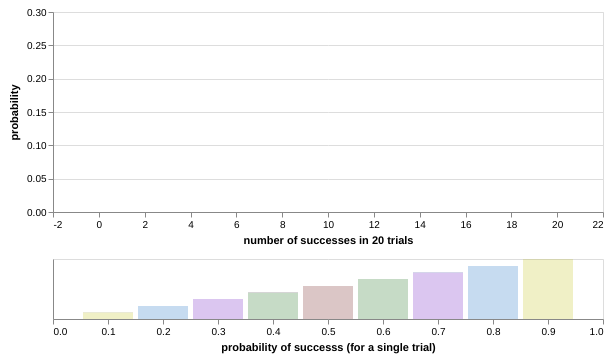

In [11]:
from scipy.stats import binom, norm  # library for statistical functions
from numpy import arange             # numerical library
from pandas import DataFrame         # library for data analysis
from altair import *                 # graphic library
renderers.enable('notebook')         # make altair aware of the notebook 
palette=['olive','darkcyan','darkviolet','darkgreen',
         'firebrick','darkgreen','darkviolet','darkcyan','olive']
n = 20                               # number of trials
p = arange(0.1,0.99,0.1)             # array of probabilities of success
x = arange(n+1)                      # array of number of successes
pmf = DataFrame({})
for q in list(p):
    pmf = pmf.append(DataFrame({'successes': x, 
                                'probability': binom.pmf(x,n,q),
                                'p': q,
                               })
                     )
click = selection_multi(fields=['p'], # Set the click behaviour
                        toggle=True, 
                        empty='none', 
                        on='click',
                        )
pmf_plot = Chart()                    # Construct the first chart
pmf_plot = pmf_plot.properties(width=550,
                               height= 200,
                              )
pmf_plot = pmf_plot.encode(x=X('successes:Q', 
                               axis=Axis(title=f'number of successes in {n} trials',
                                         grid=False,
                                         ),                  
                               ), 
                           y=Y('probability:Q',
                                axis=Axis(title='probability'),
                                stack=None,
                              ),
                           color=Color('p',
                                       scale=Scale(range=palette),
                                       legend=None,
                                      ),
                           opacity=value(0.5)
                           )                                                    
pmf_plo_ = pmf_plot.mark_bar(size=0 )     # phantom graph to stabilize the axis size  
pmf_plot = pmf_plot.mark_bar(size=400/n)  # initialization the actual graph
pmf_plot = pmf_plot.transform_filter(click)
bottom = Chart()                          # menu of success propabilities
bottom = bottom.mark_bar(size=50)
bottom = bottom.properties(width=550,
                           height= 60,
                           selection=click,
                           )
bottom = bottom.encode(x=X('p:Q',
                           axis=Axis(title='probability of successs (for a single trial)',
                                     grid=False,
                                     ),
                            ),
                        y=Y('p:Q',
                            axis=Axis(title='',
                                      values=[],
                                      ),
                            ),

                        color=Color('p',
                                    scale=Scale(range=palette),
                                    legend=None,
                                    ),   
                        opacity=condition(click, value(0.07), value(0.01)),
                        )
final = vconcat(pmf_plot+pmf_plo_,     # Put the two charts one obove the other
        bottom,
        data=pmf,
        )
final